1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


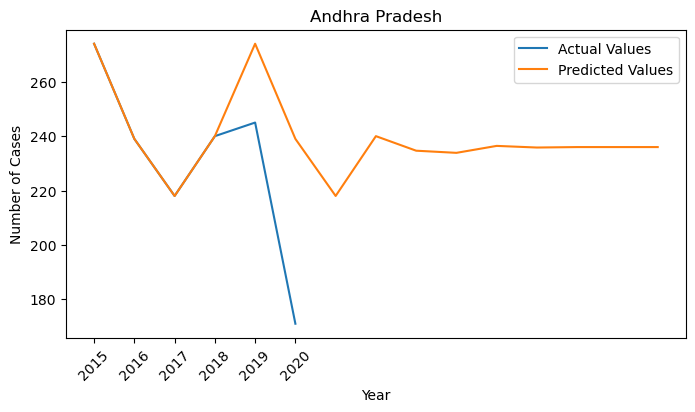

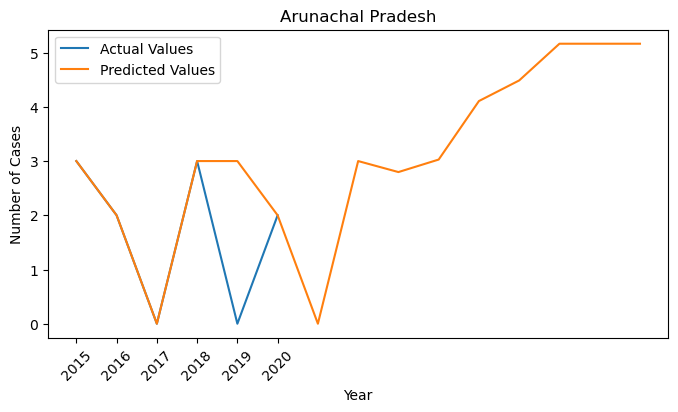

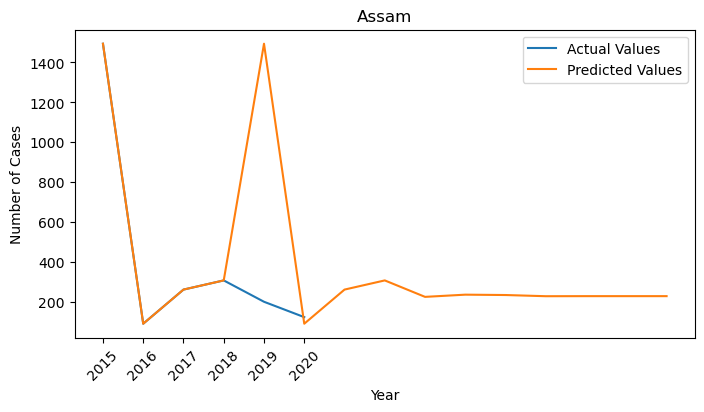

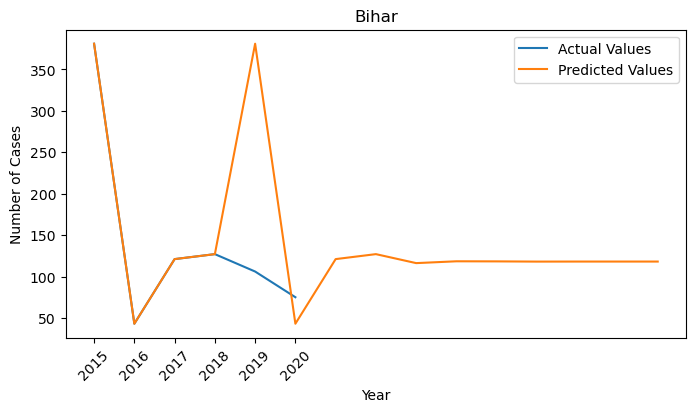

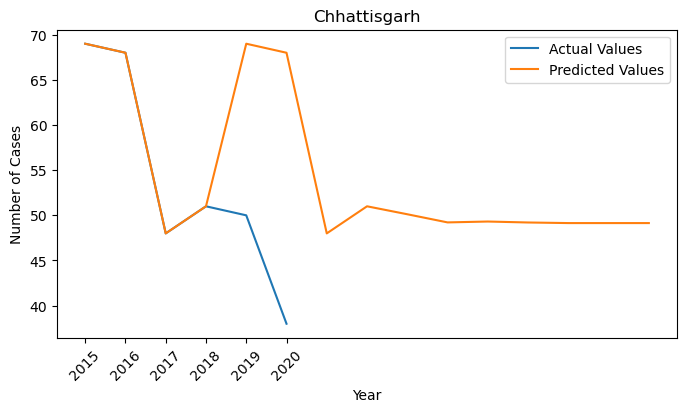

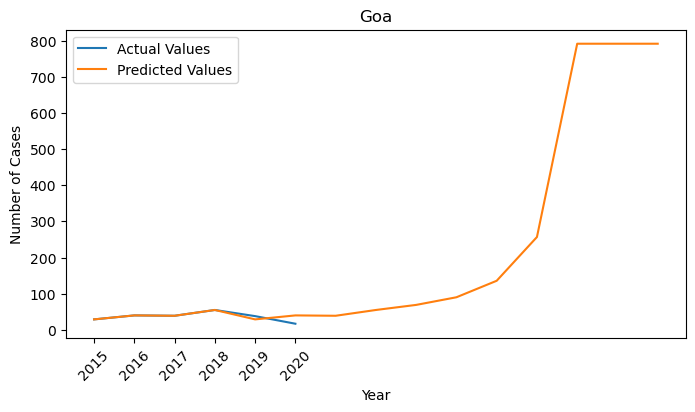

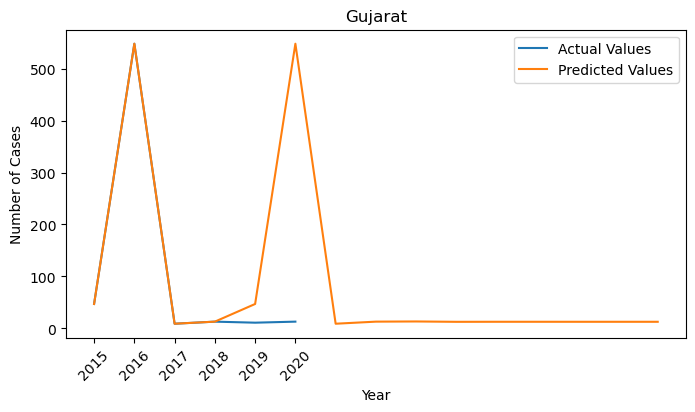

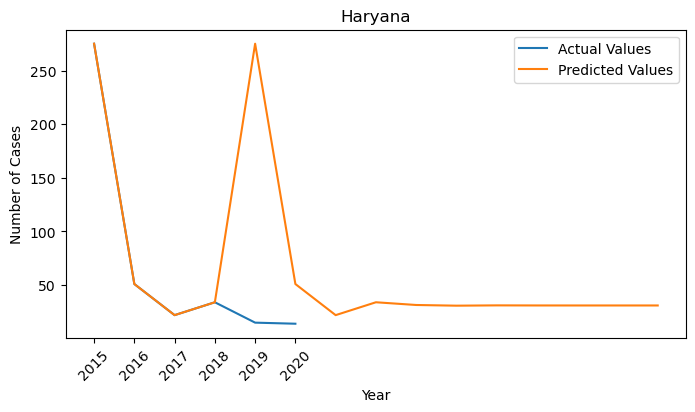

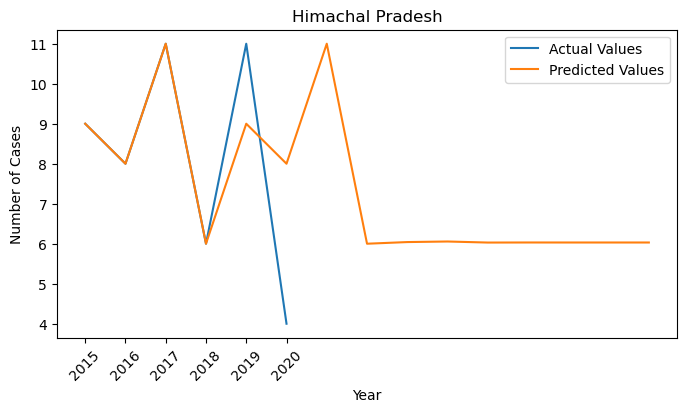

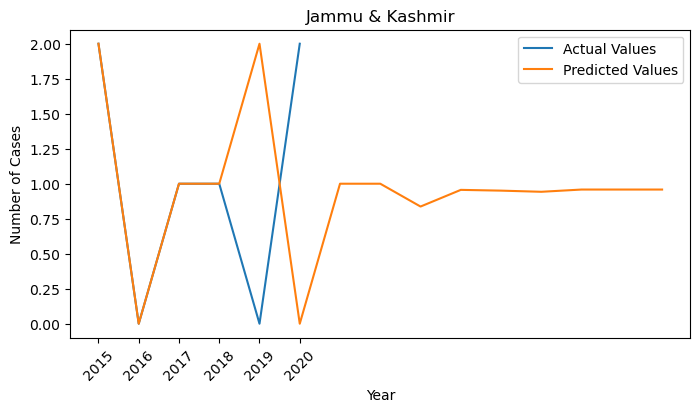

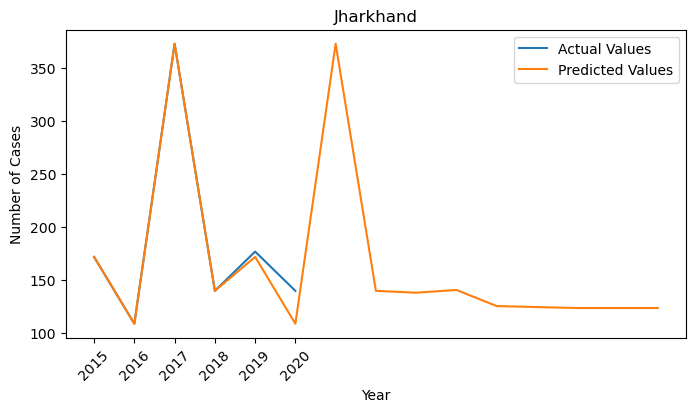

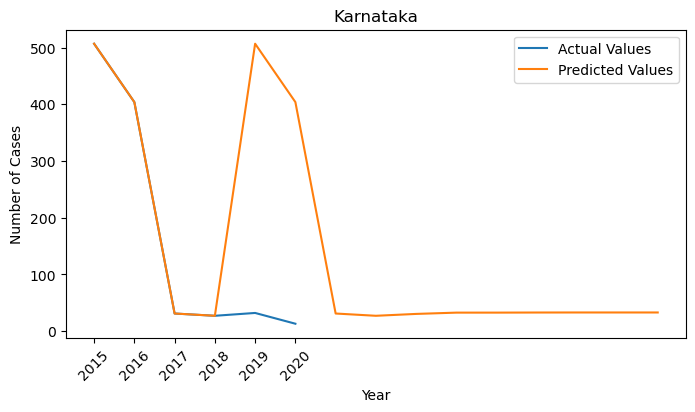

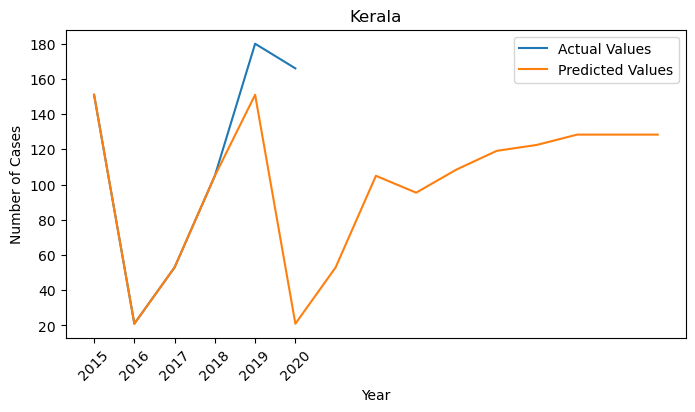

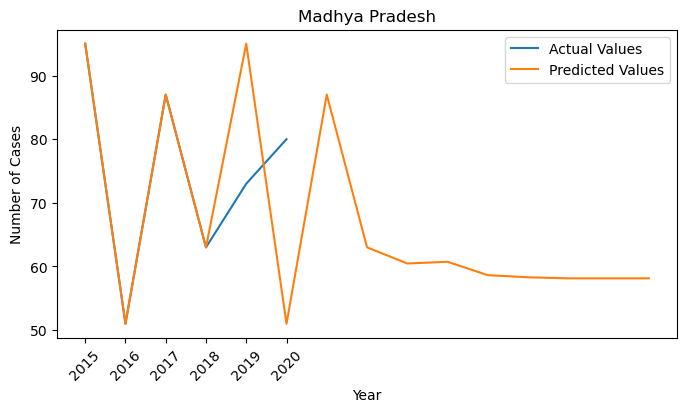

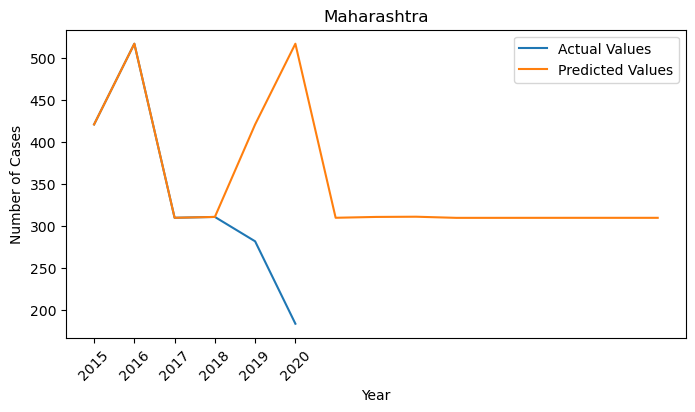

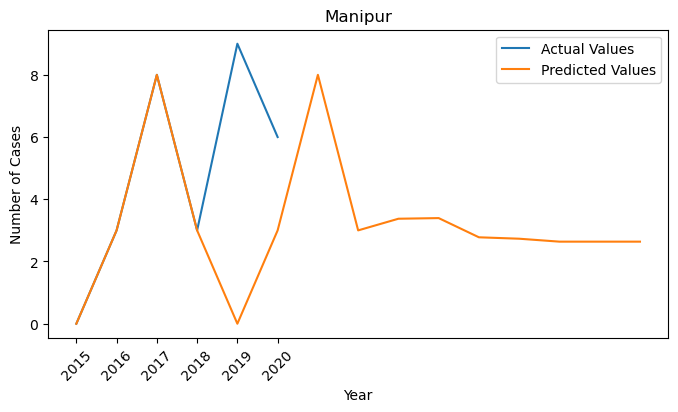

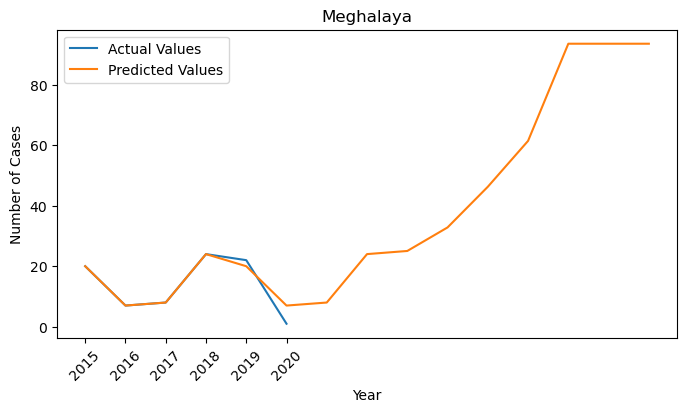

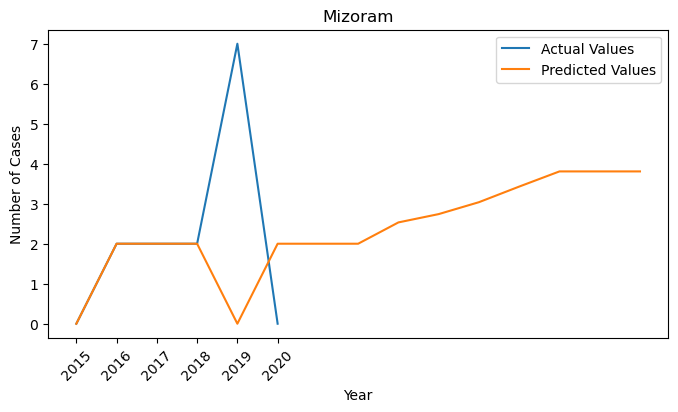

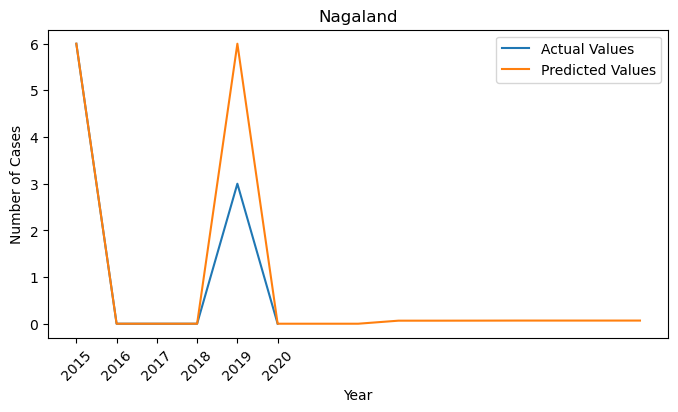

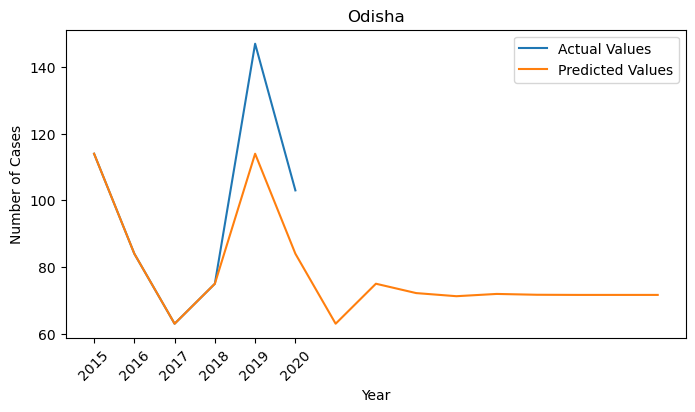

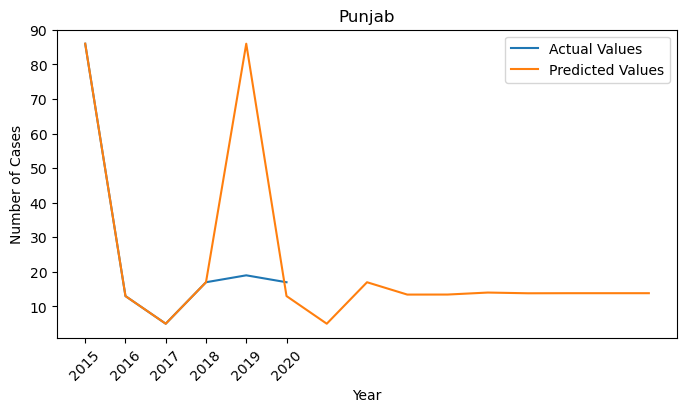

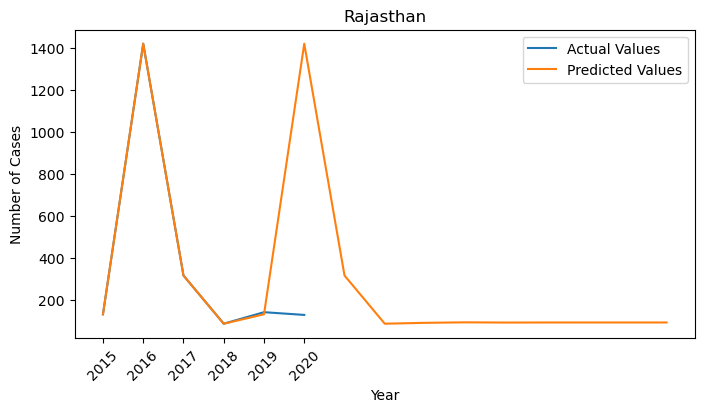

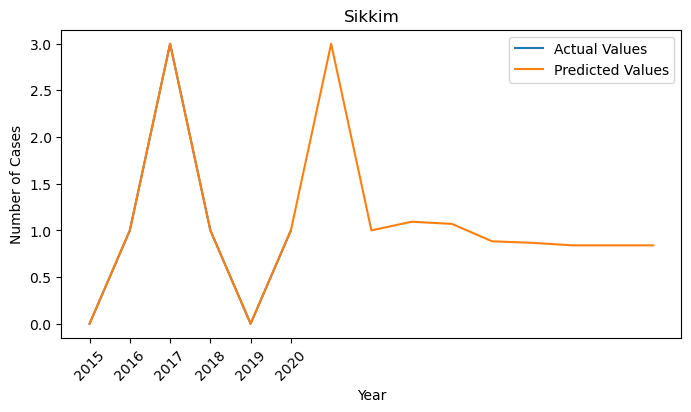

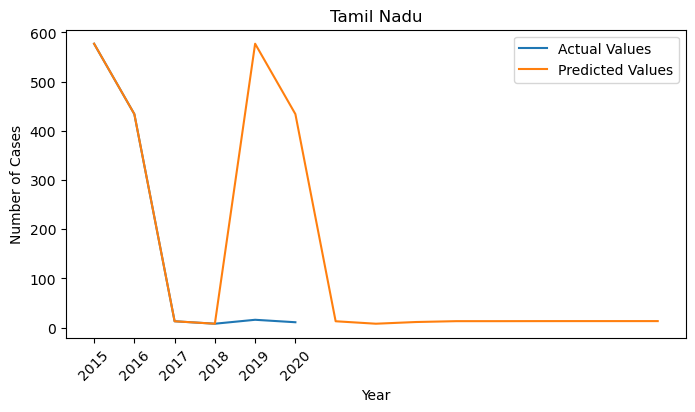

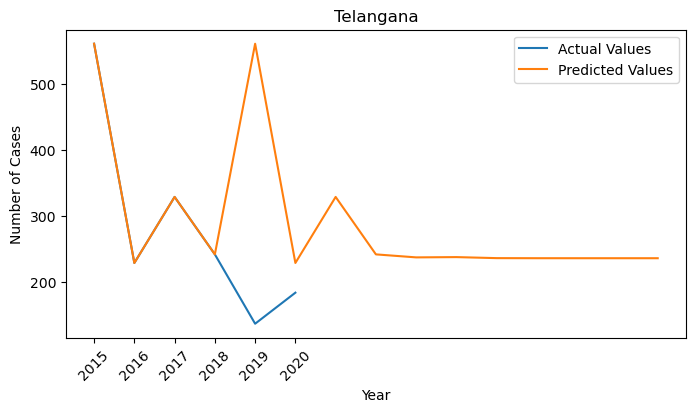

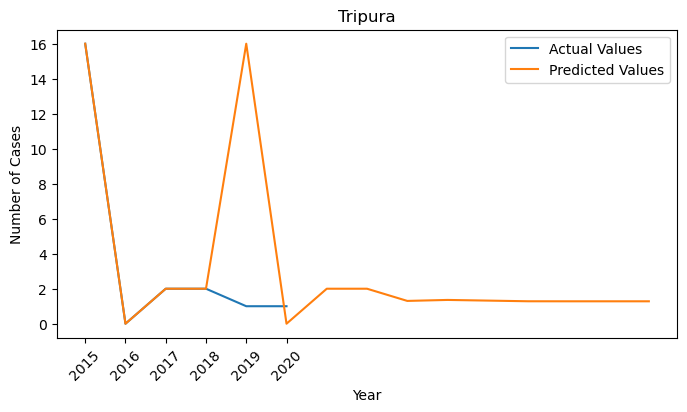

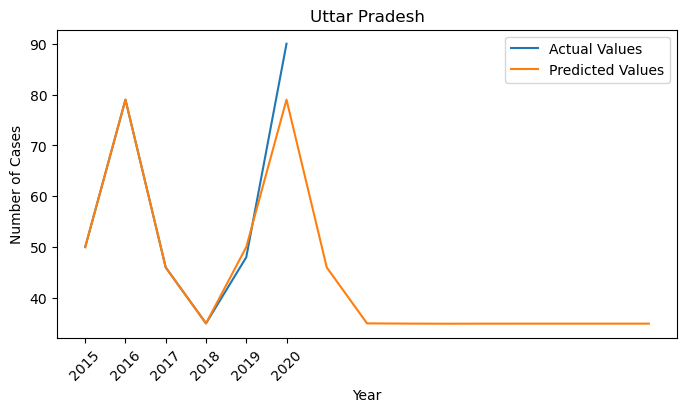

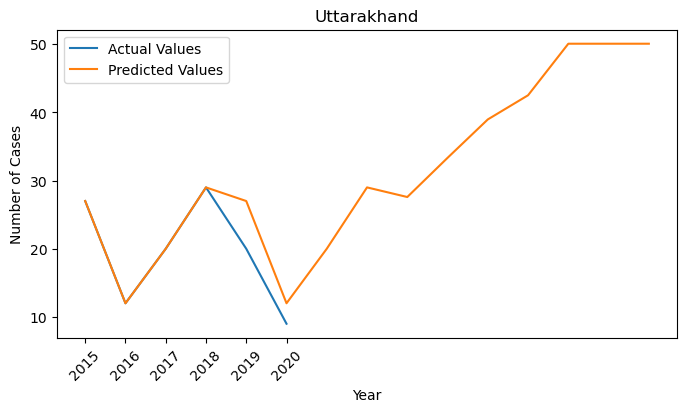

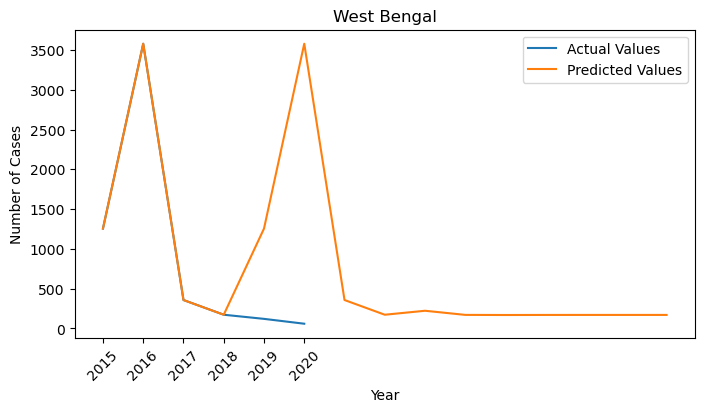

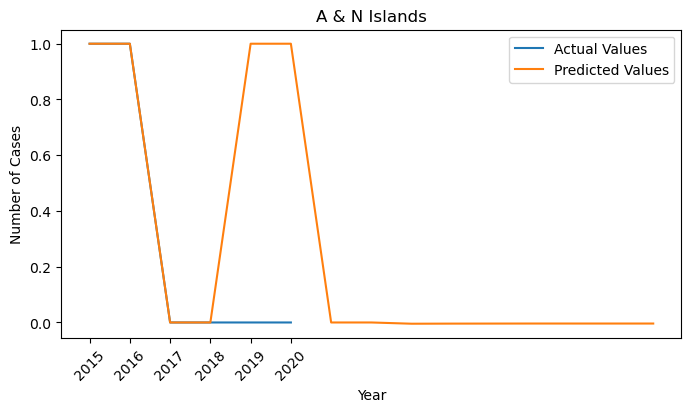

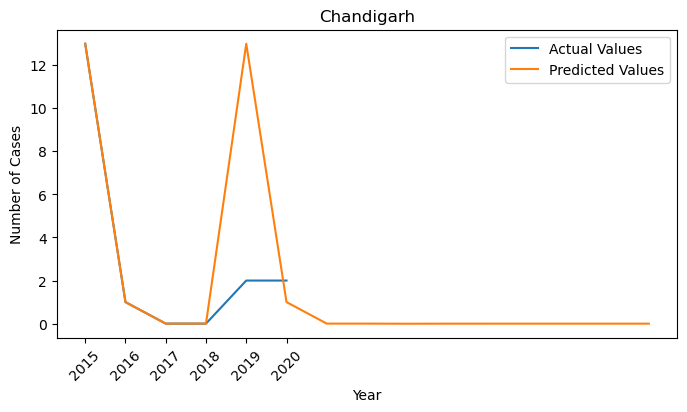

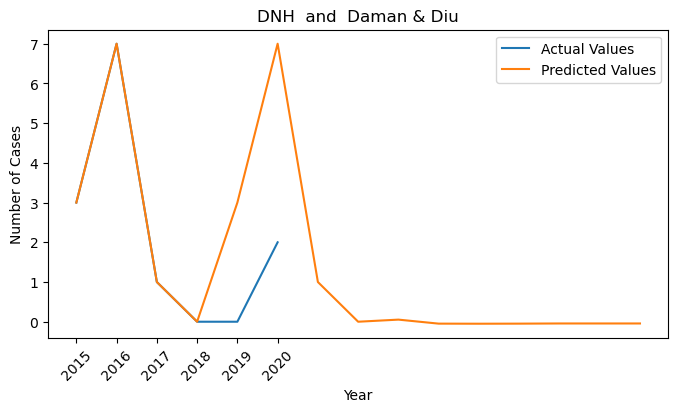

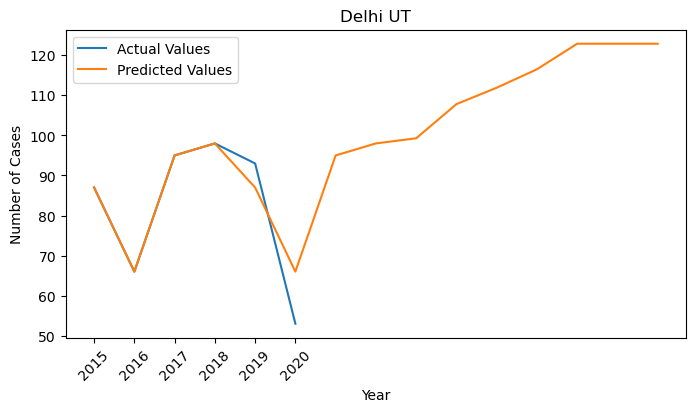

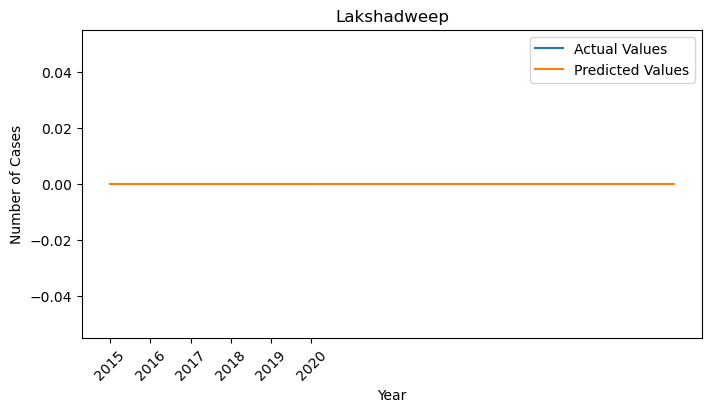

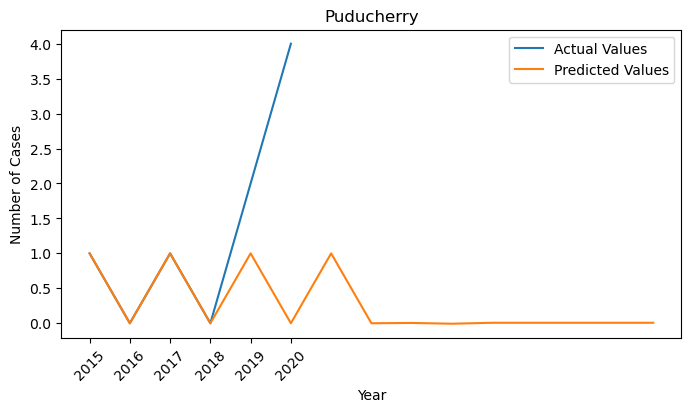

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Human trafficking 15-20.csv')

# Get the list of states from the first column
states = df.iloc[:, 0].unique()

# Create a dictionary to store the models and predictions for each state
models = {}
predictions = {}

# Loop over each state and train a separate LSTM model
for state in states:
    # Get the data for the current state
    data = df[df.iloc[:, 0] == state].iloc[:, 1:].squeeze().values

    # Split the data into training and testing sets
    train_data = data[:-2]
    test_data = data[-2:]

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data = scaler.fit_transform(train_data.reshape(-1, 1))
    test_data = scaler.transform(test_data.reshape(-1, 1))

    # Convert the data into sequences of length 3
    train_sequences = []
    train_labels = []
    for i in range(3, len(train_data)):
        train_sequences.append(train_data[i-3:i])
        train_labels.append(train_data[i])
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)

    # Build the LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(train_sequences, train_labels, epochs=100, verbose=0)

    # Make predictions for the next 5 years
    test_sequences = []
    last_sequence = train_data[-3:]
    for i in range(5):
        next_sequence = model.predict(last_sequence.reshape(1, 3, 1))
        test_sequences.append(next_sequence)
        last_sequence = np.vstack([last_sequence[1:], next_sequence])
    test_sequences = np.array(test_sequences)
    test_sequences = scaler.inverse_transform(test_sequences.reshape(-1, 1)).squeeze()
    predictions[state] = np.concatenate([data[:-2], test_sequences])

    # Store the trained model
    models[state] = model

# Plot the predicted values for each state
for state in states:
    # Get the actual and predicted values for the current state
    actual_values = df[df.iloc[:, 0] == state].iloc[:, 1:].squeeze().values
    predicted_values = np.concatenate([actual_values[:-2], predictions[state], np.repeat(predictions[state][-1], 2)])

    # Create a plot for the current state
    plt.figure(figsize=(8, 4))
    plt.plot(actual_values, label='Actual Values')
    plt.plot(predicted_values, label='Predicted Values')
    plt.xticks(np.arange(len(actual_values)), np.arange(2015, 2023), rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    plt.title(state)
    plt.legend()
    plt.show()

In [7]:
# Create a dictionary to store the accuracy for each state
accuracy = {}

# Loop over each state
for state in states:
    # Get the actual and predicted values for the current state
    actual_values = df[df.iloc[:, 0] == state].iloc[:, 1:].squeeze().values
    predicted_values = np.concatenate([actual_values[:-2], predictions[state], np.repeat(predictions[state][-1], 2)])

    # Calculate the mean absolute percentage error (MAPE) for the current state
    mape = np.mean(np.abs((actual_values - predicted_values[:6]) / actual_values)) * 100

    # Store the accuracy for the current state
    accuracy[state] = 100 - mape

# Print the accuracy for each state
for state, acc in accuracy.items():
    if acc != 'nan':
        print(state, ':', acc, '%')

Andhra Pradesh : 91.39953057246291 %
Arunachal Pradesh : nan %
Assam : -11.649414219226458 %
Bihar : 49.649895178197056 %
Chhattisgarh : 80.50877192982456 %
Goa : 73.50361197110422 %
Gujarat : -640.4428904428904 %
Haryana : -232.9365079365079 %
Himachal Pradesh : 80.3030303030303 %
Jammu & Kashmir : nan %
Jharkhand : 95.83871401668011 %
Karnataka : -648.6778846153846 %
Kerala : 82.7565818830879 %
Madhya Pradesh : 88.93550228310502 %
Maharashtra : 61.62182649809847 %
Manipur : nan %
Meghalaya : -1.5151515151515156 %
Mizoram : nan %
Nagaland : nan %
Odisha : 93.18406974440262 %
Punjab : 37.306501547987615 %
Rajasthan : -69.67161643026006 %
Sikkim : nan %
Tamil Nadu : -1125.2840909090908 %
Telangana : 44.34240452766317 %
Tripura : nan %
Uttar Pradesh : 97.26851851851852 %
Uttarakhand : 88.61111111111111 %
West Bengal : -1051.9891713747645 %
A & N Islands : nan %
Chandigarh : nan %
DNH  and  Daman & Diu : nan %
Delhi UT : 94.83668086833029 %
Lakshadweep : nan %
Puducherry : nan %


<ipython-input-7-f490b4ef4f59>:11: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((actual_values - predicted_values[:6]) / actual_values)) * 100
<ipython-input-7-f490b4ef4f59>:11: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((actual_values - predicted_values[:6]) / actual_values)) * 100


In [8]:
# Create a dictionary to store the MAE for each state
mae_dict = {}

# Loop over each state
for state in states:
    # Get the actual and predicted values for the current state
    actual_values = df[df.iloc[:, 0] == state].iloc[:, 1:].squeeze().values
    predicted_values = np.concatenate([actual_values[:-2], predictions[state], np.repeat(predictions[state][-1], 2)])

    # Calculate the MAE for the current state
    mae = np.mean(np.abs(predicted_values[:6] - actual_values))
    mae_dict[state] = mae

# Print the MAE for each state
for state, mae in mae_dict.items():
    print(f"MAE for {state}: {mae}")


MAE for Andhra Pradesh: 16.166666666666668
MAE for Arunachal Pradesh: 0.5
MAE for Assam: 221.0
MAE for Bihar: 51.166666666666664
MAE for Chhattisgarh: 8.166666666666666
MAE for Goa: 5.333333333333333
MAE for Gujarat: 95.16666666666667
MAE for Haryana: 49.5
MAE for Himachal Pradesh: 1.0
MAE for Jammu & Kashmir: 0.6666666666666666
MAE for Jharkhand: 6.0
MAE for Karnataka: 144.33333333333334
MAE for Kerala: 29.0
MAE for Madhya Pradesh: 8.5
MAE for Maharashtra: 78.66666666666667
MAE for Manipur: 2.0
MAE for Meghalaya: 1.3333333333333333
MAE for Mizoram: 1.5
MAE for Nagaland: 0.5
MAE for Odisha: 8.666666666666666
MAE for Punjab: 11.833333333333334
MAE for Rajasthan: 217.33333333333334
MAE for Sikkim: 0.0
MAE for Tamil Nadu: 164.0
MAE for Telangana: 78.16666666666667
MAE for Tripura: 2.6666666666666665
MAE for Uttar Pradesh: 2.1666666666666665
MAE for Uttarakhand: 1.6666666666666667
MAE for West Bengal: 775.8333333333334
MAE for A & N Islands: 0.3333333333333333
MAE for Chandigarh: 2.0
MAE f